# TRABAJO UT12: REDES NEURONALES CONVOLUCIONALES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
base_dir = '/content/drive/My Drive/'
train_dir = os.path.join(base_dir, 'cancer_data/train')
test_dir = os.path.join(base_dir, 'cancer_data/test')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 2667 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


##CREANDO EL MODELO

In [ ]:
# Construir el modelo CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'¡¡])

##ENTRENANDO EL MODELO

In [ ]:
# Entrenar el modelo
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples/test_generator.batch_size)

# Guardar el modelo
model.save('modelo_cancer.h5')

Epoch 1/10
83/83 [==============================] - 167s 2s/step - loss: 0.4673 - accuracy: 0.7597 - val_loss: 0.3952 - val_accuracy: 0.7909
Epoch 2/10
83/83 [==============================] - 134s 2s/step - loss: 0.4429 - accuracy: 0.7762 - val_loss: 0.4282 - val_accuracy: 0.7985
Epoch 3/10
83/83 [==============================] - 138s 2s/step - loss: 0.4182 - accuracy: 0.7927 - val_loss: 0.3692 - val_accuracy: 0.8152
Epoch 4/10
83/83 [==============================] - 136s 2s/step - loss: 0.4114 - accuracy: 0.8050 - val_loss: 0.3962 - val_accuracy: 0.8303
Epoch 5/10
83/83 [==============================] - 129s 2s/step - loss: 0.3922 - accuracy: 0.8084 - val_loss: 0.4032 - val_accuracy: 0.7955
Epoch 6/10
83/83 [==============================] - 131s 2s/step - loss: 0.3696 - accuracy: 0.8114 - val_loss: 0.3553 - val_accuracy: 0.8273
Epoch 7/10
83/83 [==============================] - 130s 2s/step - loss: 0.3634 - accuracy: 0.8163 - val_loss: 0.3509 - val_accuracy: 0.8485
Epoch 8/10
83

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


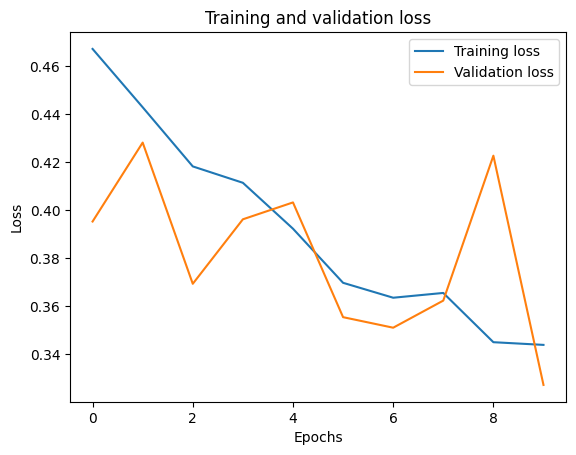

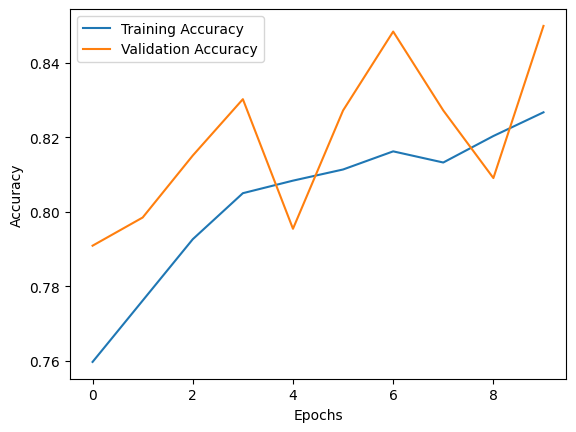

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##PREDICCIONES

1/1 [==============================] - 0s 37ms/step


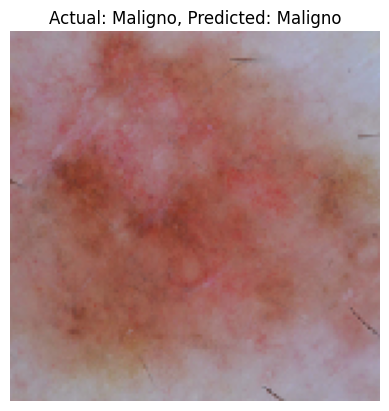

In [ ]:
sample_index = 1
x_test_batch, y_test_batch = next(test_generator)
sample_image = x_test_batch[sample_index]
sample_label = y_test_batch[sample_index]
prediction = model.predict(np.expand_dims(sample_image, axis=0))
class_label = 'Benigno' if sample_label == 0 else 'Maligno'
predicted_class = 'Benigno' if prediction < 0.5 else 'Maligno'

plt.imshow(sample_image)
plt.title(f'Actual: {class_label}, Predicted: {predicted_class}')
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 273ms/step


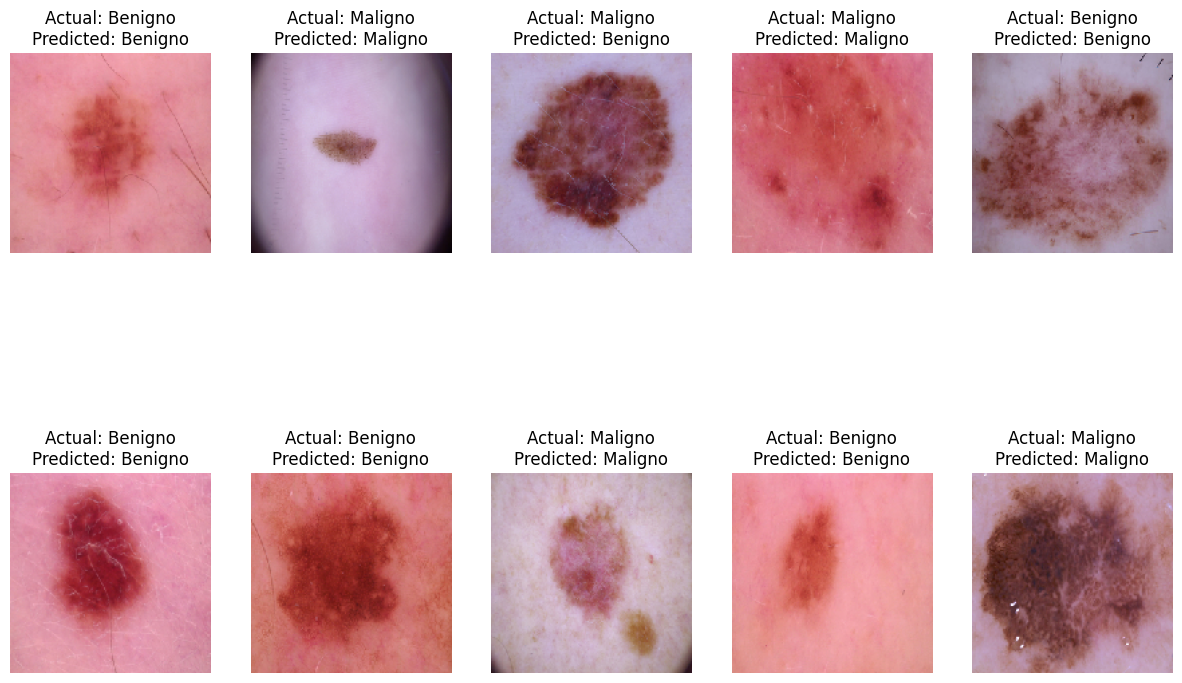

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los diez primeros lotes de imágenes y etiquetas del generador de datos de prueba
num_batches = 10
predicted_classes = []
actual_classes = []

for i in range(num_batches):
    x_test_batch, y_test_batch = next(test_generator)

    # Realizar predicciones en el lote de imágenes
    batch_predictions = model.predict(x_test_batch)

    # Convertir las predicciones a clases (Cat o Dog)
    batch_predicted_classes = ['Benigno' if prediction < 0.5 else 'Maligno' for prediction in batch_predictions]

    # Agregar las clases predichas y reales a las listas correspondientes
    predicted_classes.extend(batch_predicted_classes)
    actual_classes.extend(['Benigno' if label == 0 else 'Maligno' for label in y_test_batch])

# Mostrar las diez primeras imágenes y sus predicciones y valores reales
plt.figure(figsize=(15, 10))
for i in range(num_batches):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_batch[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

In [ ]:
predictions = model.predict(test_generator)

21/21 [==============================] - 9s 400ms/step


In [ ]:
true_classes = test_generator.classes
predicted_classes = (predictions > 0.5).astype(int)

my_conf_matrix = tensorflow.math.confusion_matrix(labels=true_classes, predictions=predicted_classes)

# Mostrar la matriz de confusión
print("Matriz de confusión:")
print(my_conf_matrix)
my_conf_matrix_np = my_conf_matrix.numpy()


Matriz de confusión:
tf.Tensor(
[[168 192]
 [149 151]], shape=(2, 2), dtype=int32)


In [ ]:
# Calcular métricas
TN = my_conf_matrix_np[0, 0]
FP = my_conf_matrix_np[0, 1]
FN = my_conf_matrix_np[1, 0]
TP = my_conf_matrix_np[1, 1]

# Calcular precisión
precision = TP / (TP + FP)

# Calcular recall
recall = TP / (TP + FN)

# Calcular puntuación F1
f1_score = 2 * (precision * recall) / (precision + recall)

# Imprimir las métricas
print("Precisión:", precision)
print("Recall:", recall)
print("Puntuación F1:", f1_score)


Precisión: 0.4402332361516035
Recall: 0.5033333333333333
Puntuación F1: 0.46967340590979784


En conclusión, según la matriz de confusión, el modelo sale muy mal. Sin embargo al observar las predicciones, me sale más o menos un 90% de acierto. He estado probando algunas cosas y sigo sin saber por que me sale así, pero mi teoría es que el modelo está bien, y que lo que he hecho mal es la matriz de confusión. He probado a hacerlo de otra manera, pero me he quedado sin tiempo. También se puede obsevar que hay overfitting en muchas épocas, así que es posible que se deba a esto. Pero aún así, parece que las predicciones si que funcionan correctamente.